In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

In [2]:
data = pd.read_csv("stats.csv")
data.rename(columns={'Количество больничных дней':'work_days', 'Возраст': 'age', 'Пол': 'gender'}, inplace=True)
data.head()

,work_days,age,gender
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [3]:
data.dtypes

work_days     int64
age           int64
gender       object
dtype: object

In [4]:
data.describe()

,work_days,age
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


#### Приступим к рассмотрению 1 гипотезы: Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

In [5]:
data[data.gender == 'М'].work_days.value_counts()
#Распределение мужчин по пропущенным дням, численно

3    31
2    31
4    25
1    16
5    12
0     8
7     7
6     5
8     4
Name: work_days, dtype: int64

In [6]:
data[data.gender == 'Ж'].work_days.value_counts()
#Распределение женщин по пропущенным дням, численно

3    23
4    23
2    16
1    14
6     9
5     8
7     3
8     1
0     1
Name: work_days, dtype: int64

In [7]:
N1, N2 = data.gender.value_counts()
print(f"Количество мужчин: {N1}, количество женщин: {N2}")
#Cколько вообще мужчин и женщин

Количество мужчин: 139, количество женщин: 98


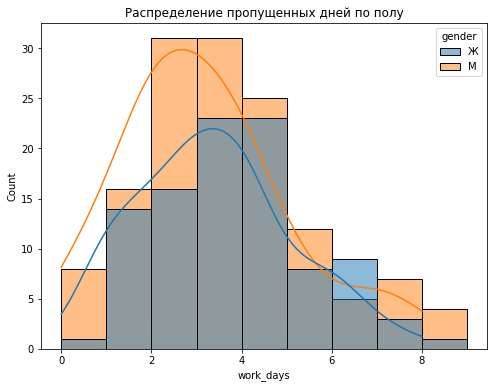

In [8]:
bins = np.arange(0, 10, 1)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='work_days', hue='gender', kde=True, bins = bins)
plt.title('Распределение пропущенных дней по полу')
plt.show()
#Строим гистограмму, показывающую распределение пропущенных дней относительно пола сотрудника

Видим что мужчин в компании больше, следовательно статистика, показывающая количество, нас не интересует.

##### Произведем сравнение средних по T-критерию

Так как выборки независимы:

1 выборка - мужчины, 2 выборка - женщины.

Выборки: $X_{11}, ... , X_{1N1} \sim N(\mu_{1}, \sigma_{1}), X_{21}, ... , X_{2N2} \sim N(\mu_{2}, \sigma_{2}),  
 \sigma_{1}, \sigma_{2}$ - не известны

Пусть, мат. ожидание первой выборки - это $μ_{1}$, а мат. ожидание второй выборки - это $μ_{2}$.

Выдвинем нулевую гипотезу: $μ_{1} \le μ_{2}$

Соответственно, альтернативная гипотеза: $μ_{1}$ > $μ_{2}$

Статистика $T_{N}$: $$T_{N}=\frac{\overline{X_{1}}-\overline{X_{2}}}{\sqrt{\frac{S_{1}^{2}}{N_{1}}-\frac{S_{2}^{2}}{N_{2}}}}$$

Нулевое распределение: $Т_{N} \sim St(v))$

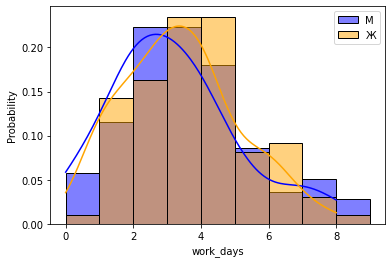

In [9]:
import numpy as np
bins = np.arange(0, 10, 1)
sns.histplot(
    data[data.gender == 'М'].work_days, bins=bins,
    color='blue', alpha=0.5, label='M', stat='probability', kde = True)
sns.histplot(
    data[data.gender == 'Ж'].work_days, bins=bins,
    color='orange', alpha=0.5, label='Ж', stat='probability', kde = True)
plt.legend(loc=1)
plt.show()
#Строим гистограмму, показывающую распределение вероятности количества пропущенных дней относительно пола сотрудника

In [10]:
t_statistic, p_value = ttest_ind(
    data[(data.gender == 'М') & (data.work_days > 2)].work_days,
    data[(data.gender == 'Ж') & (data.work_days > 2)].work_days,
    equal_var=False,
    alternative='less'
)

print('Гипотеза 1: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.')
print('p-value:', p_value)
print('statistic:', t_statistic)

Гипотеза 1: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
p-value: 0.6635666716601236
statistic: 0.42305776080458846


По p-value можно судить о том, что у нас нет достаточно доказательств, чтобы отбросить нулевую гипотезу и принять альтернативную гипотезу. 

Исходя из этих результатов, мы не можем сделать вывод, что мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.

#### Приступим к рассмотрению 2 гипотезы: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

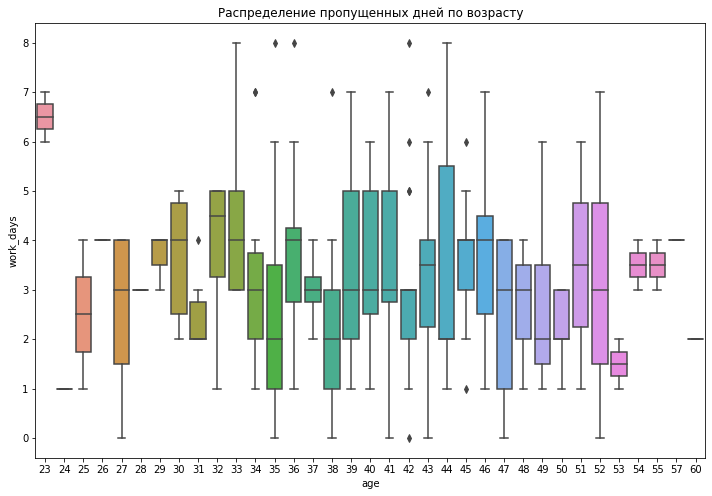

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age', y='work_days', data=data)
plt.title('Распределение пропущенных дней по возрасту')
plt.show()

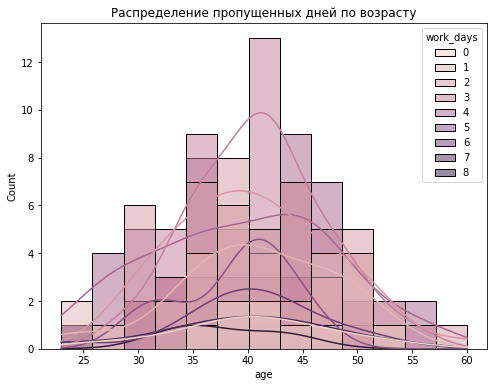

In [12]:
bins = np.arange(0, 60, 1)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='work_days', kde=True)
plt.title('Распределение пропущенных дней по возрасту')
plt.show()
#Строим гистограмму, показывающую распределение пропущенных дней относительно возраста сотрудника

In [13]:
data["age_type"] = ['old' if age > 35 else 'young' for age in data['age']]
data.head()
#Создадим отдельную бинарную колонку, показывающую, к какой возрастной группе относится сотрудник

,work_days,age,gender,age_type
0,5,39,Ж,old
1,4,54,М,old
2,4,26,М,young
3,5,42,М,old
4,4,29,М,young


In [14]:
data["age_type"].value_counts()

old      180
young     57
Name: age_type, dtype: int64

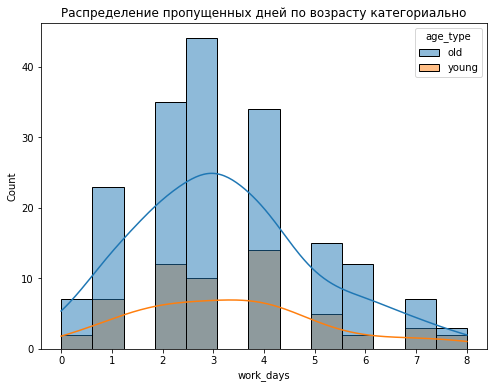

In [23]:
bins = np.arange(0, 10, 1)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, hue='age_type', x='work_days', kde=True)
plt.title('Распределение пропущенных дней по возрасту категориально')
plt.show()

Как в предыдущем случае, из-за различий в количестве представителей групп, нас не интересует данная статистика

Произведем сравнение средних по T-критерию, как в прошлом случае:

Выдвинем нулевую гипотезу: $μ_{1} \le μ_{2}$

Соответственно, альтернативная гипотеза: $μ_{1}$ > $μ_{2}$

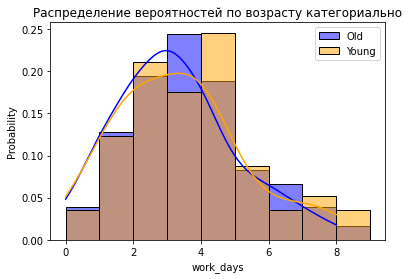

In [24]:
bins = np.arange(0, 10, 1)
sns.histplot(
    data[data.age_type == 'old'].work_days, bins=bins,
    color='blue', alpha=0.5, label='Old', stat='probability', kde = True)
sns.histplot(
    data[data.age_type == 'young'].work_days, bins=bins,
    color='orange', alpha=0.5, label='Young', stat='probability', kde = True)
plt.legend(loc=1)
plt.title('Распределение вероятностей по возрасту категориально')
plt.show()
#Строим гистограмму, показывающую распределение вероятности количества пропущенных дней относительно возраста сотрудника

In [17]:
t_statistic, p_value = ttest_ind(
    data[(data.age_type == 'old') & (data.work_days > 2)].work_days,
    data[(data.age_type == 'young') & (data.work_days > 2)].work_days,
    equal_var=False,
    alternative='less'
)

print('Гипотеза 2: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.')
print('p-value:', p_value)
print('statistic:', t_statistic)

Гипотеза 2: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
p-value: 0.23387909366638776
statistic: -0.7311771255234801


Полученное значение p-value означает, что у нас нет достаточно доказательств, чтобы отбросить нулевую гипотезу и принять альтернативную гипотезу.
Исходя из этих результатов, мы не можем сделать вывод, что работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
Мы не имеем статистически значимых доказательств в пользу этой альтернативной гипотезы.